A notebook to test the scanpro tool.

The propeller tool was developed originally for R and is integrated in the package "speckle" (Belinda Phipson, Choon Boon Sim, Enzo R Porrello, Alex W Hewitt, Joseph Powell, Alicia Oshlack).

Since propeller uses functionalities from the package "limma", these functions has been reimplemented to be used by scanpro.

The dataset used in this tutorial is the same used in the "speckle" vignette.

In [1]:
import anndata as ad
import numpy as np

from scanpro import scanpro
from scanpro.linear_model import create_design
from scanpro.get_transformed_props import get_transformed_props

In [2]:
# Set seed to make simulations reproducible
np.random.seed(1)

-------------

# Load anndata
* anndata.obs table has to include 3 columns:
    - condition
    - sample
    - clusters/celltypes

In [3]:
adata = ad.read_h5ad('scanpro_tutorial.h5ad')
adata

AnnData object with n_obs × n_vars = 2802 × 13575
    obs: 'sample', 'group', 'cluster'
    uns: 'color_set', 'infoprocess'

In [4]:
adata.obs

,sample,group,cluster
CELL_000001,S1,10x,HCC827
CELL_000002,S1,10x,H1975
CELL_000003,S1,10x,HCC827
CELL_000004,S1,10x,HCC827
CELL_000005,S1,10x,HCC827
...,...,...,...
CELL_000140,S6,dropseq,H2228
CELL_000233,S6,dropseq,H1975
CELL_000082,S6,dropseq,HCC827
CELL_000012,S6,dropseq,H1975


--------------

# Run scanpro
* You can use the wrapper function "scanpro". 
#### Parameters are:
    - anndata object
    - clusters: name of clusters/celltypes column in obs table
    - sample: name of sample column in obs table
    - cond: name of condition/group column in obs table
    - transform: type of transformation; logit or arcsin, default is logit

In [5]:
out = scanpro.scanpro(adata, clusters_col='cluster', samples_col='sample', conds_col='group', transform='logit')

out.results

{'10x_S1': 'S1', '10x_S2': 'S2', 'celseq_S3': 'S3', 'celseq_S4': 'S4', 'dropseq_S5': 'S5', 'dropseq_S6': 'S6'}
There are more than 2 conditions. ANOVA will be performed...
Done!
          mean_props_10x  mean_props_celseq  mean_props_dropseq  f_statistics   
clusters                                                                        
H1975           0.339246           0.394154            0.388881      3.994837  \
H2228           0.348115           0.297449            0.311114      3.400526   
HCC827          0.312639           0.308397            0.300004      0.207697   

          p_values  adjusted_p_values  
clusters                               
H1975     0.018410           0.050034  
H2228     0.033356           0.050034  
HCC827    0.812453           0.812453  
cluster  H1975  H2228  HCC827
sample                       
S1         313    315     274
S2         299    313     290
S3         114     81      79
S4         102     82      90
S5          92     65      68
S6    

,baseline_props,mean_props_10x,mean_props_celseq,mean_props_dropseq,f_statistics,p_values,adjusted_p_values,baseline_props
clusters,,,,,,,,
H1975,0.357959,0.339246,0.394154,0.388881,3.994837,0.018410,0.050034,0.357959
H2228,0.332263,0.348115,0.297449,0.311114,3.400526,0.033356,0.050034,0.332263
HCC827,0.309779,0.312639,0.308397,0.300004,0.207697,0.812453,0.812453,0.309779


### the `scanpro` function generates a ScanproResult object that has the following methods:
    - results: returns the results as a dataframe
    - props: returns clusters proportions as a dataframe
    - prop_trans: returns transformed proportions as a dataframe
    - counts: returns counts as a dataframe
    - design: returns the design matrix
    - plot and plot_samples: for plotting

In [6]:
out.props

cluster,H1975,H2228,HCC827
sample,,,
S1,0.347006,0.349223,0.303770
S2,0.331486,0.347006,0.321508
S3,0.416049,0.295625,0.288326
S4,0.372259,0.299274,0.328468
S5,0.408879,0.288895,0.302226
S6,0.368884,0.333333,0.297783


-----------

## Visualisation of proportions for each condition in each cluster
#### You can plot proportion per condition using `out.plot()` function. Parameters are:
    - kind: kind of plot: `stripplot`, `barplot` or `boxplot`
    - clusters: specify which clusters you want to plot, default is all
    - save: path to where you want to save the plot
#### or `out.plot_samples()` to plot a bar plot of proportions of clusters in samples. Parameters are:
    - stacked: True for stacked bar plot
    - x: Whether samples or clusters should be on the x axis
    - save: path to where you want to save the plot

       H1975     H2228    HCC827 sample    group
0   0.347006  0.349223  0.303770     S1      10x
1   0.331486  0.347006  0.321508     S2      10x
8   0.416049  0.295625  0.288326     S3   celseq
9   0.372259  0.299274  0.328468     S4   celseq
16  0.408879  0.288895  0.302226     S5  dropseq
17  0.368884  0.333333  0.297783     S6  dropseq


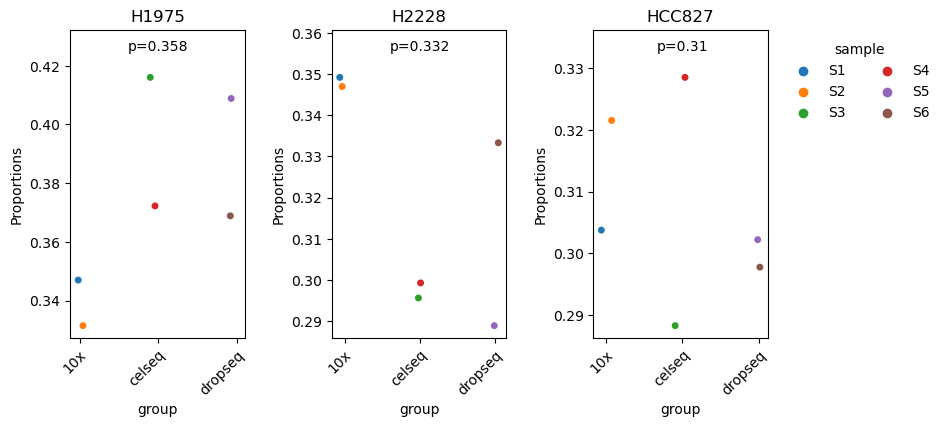

In [7]:
out.plot()

You can use `kind` to set different styles for the plot:

       H1975     H2228    HCC827 sample    group
0   0.347006  0.349223  0.303770     S1      10x
1   0.331486  0.347006  0.321508     S2      10x
8   0.416049  0.295625  0.288326     S3   celseq
9   0.372259  0.299274  0.328468     S4   celseq
16  0.408879  0.288895  0.302226     S5  dropseq
17  0.368884  0.333333  0.297783     S6  dropseq


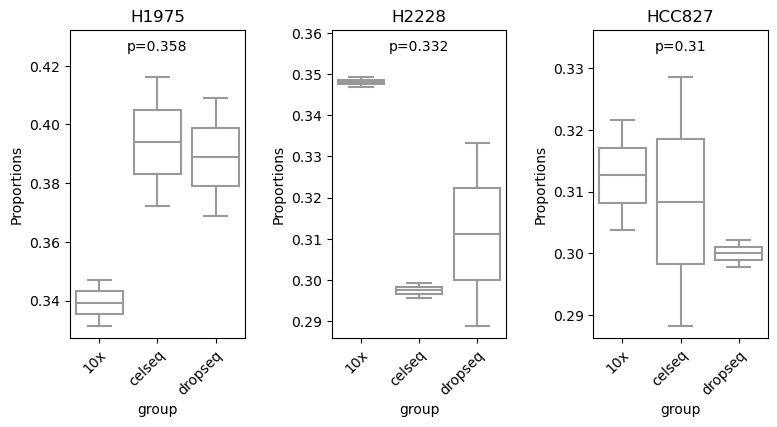

In [8]:
out.plot(kind="boxplot")

       H1975     H2228    HCC827 sample    group
0   0.347006  0.349223  0.303770     S1      10x
1   0.331486  0.347006  0.321508     S2      10x
8   0.416049  0.295625  0.288326     S3   celseq
9   0.372259  0.299274  0.328468     S4   celseq
16  0.408879  0.288895  0.302226     S5  dropseq
17  0.368884  0.333333  0.297783     S6  dropseq


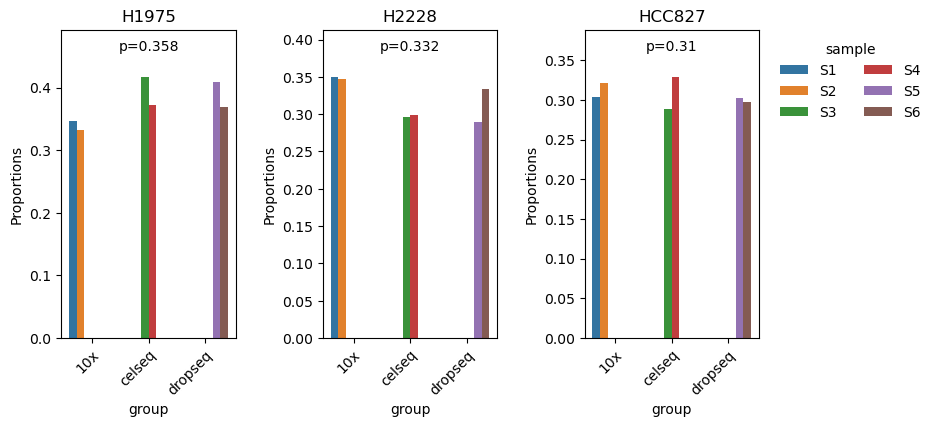

In [9]:
out.plot(kind="barplot")

You can use `clusters` to limit the clusters shown:

       H1975     H2228    HCC827 sample    group
0   0.347006  0.349223  0.303770     S1      10x
1   0.331486  0.347006  0.321508     S2      10x
8   0.416049  0.295625  0.288326     S3   celseq
9   0.372259  0.299274  0.328468     S4   celseq
16  0.408879  0.288895  0.302226     S5  dropseq
17  0.368884  0.333333  0.297783     S6  dropseq


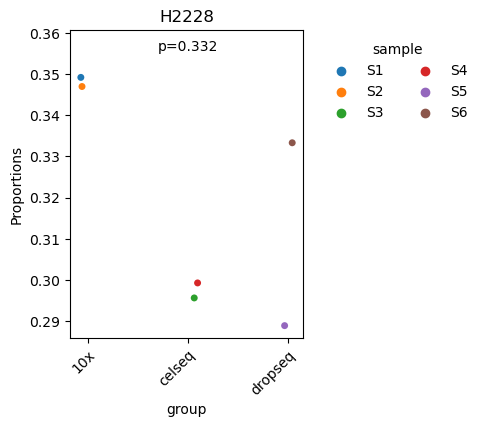

In [10]:
out.plot(clusters=["H2228"])

Proportions of cells per sample can be plotted with `plot_samples`:

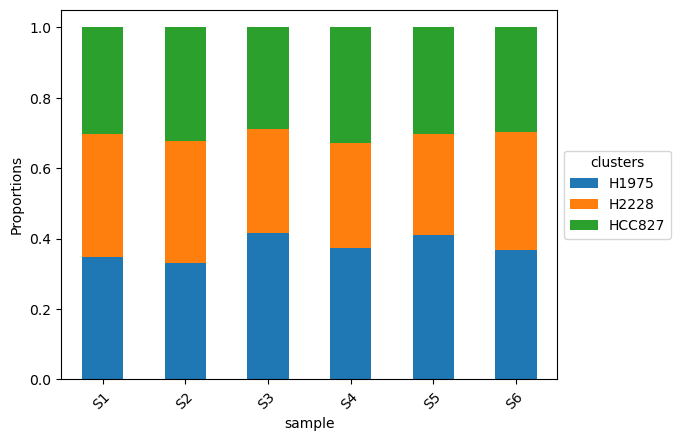

In [11]:
out.plot_samples(stacked=True)

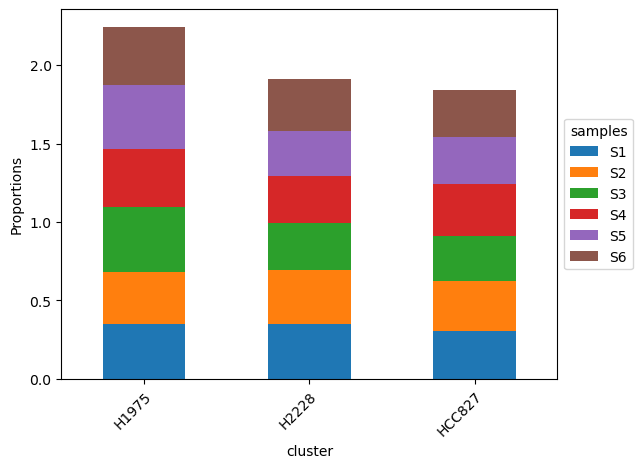

In [12]:
out.plot_samples(x="clusters")

------

## Test specific conditions
* by using the parameter `conditions` you can specify conditions of interests you want to compare instead of comparing all the conditions

In [13]:
out = scanpro.scanpro(adata, clusters_col='cluster', samples_col='sample', 
                              conds_col='group', transform='logit', conditions=['10x', 'celseq'])

out.results

{'10x_S1': 'S1', '10x_S2': 'S2', 'celseq_S3': 'S3', 'celseq_S4': 'S4', 'dropseq_S5': 'S5', 'dropseq_S6': 'S6'}
There are 2 conditions. T-Test will be performed...
Done!
          mean_props_10x  mean_props_celseq  prop_ratio  t_statistics   
clusters                                                                
H1975           0.339246           0.394154    0.860694     -2.559883  \
H2228           0.348115           0.297449    1.170334      2.520252   
HCC827          0.312639           0.308397    1.013756      0.225837   

          p_values  adjusted_p_values  
clusters                               
H1975     0.030693           0.049133  
H2228     0.032755           0.049133  
HCC827    0.826373           0.826373  
cluster  H1975  H2228  HCC827
sample                       
S1         313    315     274
S2         299    313     290
S3         114     81      79
S4         102     82      90
S5          92     65      68
S6          83     75      67
cluster     H1975     H22

,baseline_props,mean_props_10x,mean_props_celseq,prop_ratio,t_statistics,p_values,adjusted_p_values,baseline_props
clusters,,,,,,,,
H1975,0.357959,0.339246,0.394154,0.860694,-2.559883,0.030693,0.049133,0.357959
H2228,0.332263,0.348115,0.297449,1.170334,2.520252,0.032755,0.049133,0.332263
HCC827,0.309779,0.312639,0.308397,1.013756,0.225837,0.826373,0.826373,0.309779


In [14]:
adata.obs

,sample,group,cluster
CELL_000001,S1,10x,HCC827
CELL_000002,S1,10x,H1975
CELL_000003,S1,10x,HCC827
CELL_000004,S1,10x,HCC827
CELL_000005,S1,10x,HCC827
...,...,...,...
CELL_000140,S6,dropseq,H2228
CELL_000233,S6,dropseq,H1975
CELL_000082,S6,dropseq,HCC827
CELL_000012,S6,dropseq,H1975


       H1975     H2228    HCC827 sample    group
0   0.347006  0.349223  0.303770     S1      10x
1   0.331486  0.347006  0.321508     S2      10x
8   0.416049  0.295625  0.288326     S3   celseq
9   0.372259  0.299274  0.328468     S4   celseq
16  0.408879  0.288895  0.302226     S5  dropseq
17  0.368884  0.333333  0.297783     S6  dropseq


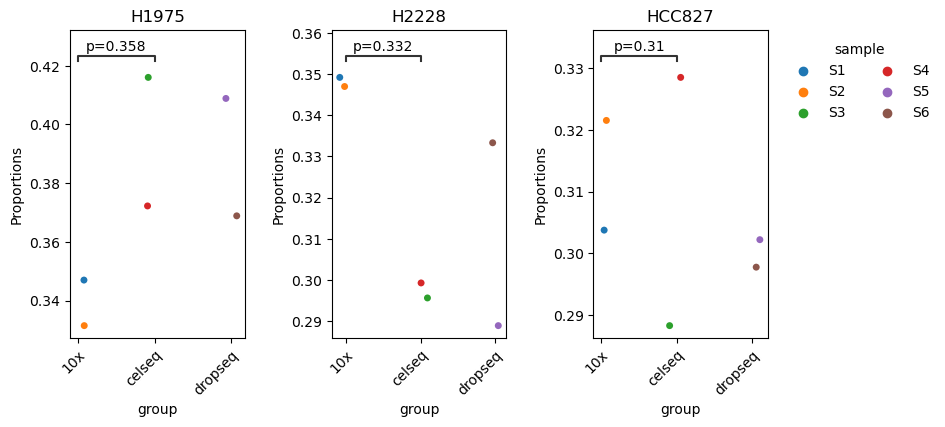

In [15]:
out.plot()

In [16]:
out.__dict__

{'results':           baseline_props  mean_props_10x  mean_props_celseq  prop_ratio   
 clusters                                                                  
 H1975           0.357959        0.339246           0.394154    0.860694  \
 H2228           0.332263        0.348115           0.297449    1.170334   
 HCC827          0.309779        0.312639           0.308397    1.013756   
 
           t_statistics  p_values  adjusted_p_values  baseline_props  
 clusters                                                             
 H1975        -2.559883  0.030693           0.049133        0.357959  
 H2228         2.520252  0.032755           0.049133        0.332263  
 HCC827        0.225837  0.826373           0.826373        0.309779  ,
 'counts': cluster  H1975  H2228  HCC827
 sample                       
 S1         313    315     274
 S2         299    313     290
 S3         114     81      79
 S4         102     82      90
 S5          92     65      68
 S6          83     75  

---------------

## Bootstrapping method
#### The bootstrapping method will run for non-replicated datasets in the following scenarios:
    - If the number of samples in samples_col is equal to the number of conditions in conds_col
    - If samples_col is not given or set to None, the dataset is assumed to be not replicated 
    and scanpro will run the bootstrapping method by setting conds_col temporarily as samples_col

In [17]:
out_boot = scanpro.scanpro(adata, clusters_col='cluster', 
                           conds_col='group', 
                           transform='arcsin',
                           n_reps=4, 
                           conditions=['10x', 'celseq']
                          )

out_boot.results

Your data doesn't have replicates! Artificial replicates will be simulated to run scanpro.
Simulation may take some minutes...
Generating 4 replicates and running 100 simulations...
{'10x_10x_rep_1': '10x_rep_1', '10x_10x_rep_2': '10x_rep_2', '10x_10x_rep_3': '10x_rep_3', '10x_10x_rep_4': '10x_rep_4', 'celseq_celseq_rep_1': 'celseq_rep_1', 'celseq_celseq_rep_2': 'celseq_rep_2', 'celseq_celseq_rep_3': 'celseq_rep_3', 'celseq_celseq_rep_4': 'celseq_rep_4', 'dropseq_dropseq_rep_1': 'dropseq_rep_1', 'dropseq_dropseq_rep_2': 'dropseq_rep_2', 'dropseq_dropseq_rep_3': 'dropseq_rep_3'}
          mean_props_10x  mean_props_celseq  prop_ratio  t_statistics   
clusters                                                                
H1975           0.367656           0.292987    1.254855      0.962444  \
H2228           0.283904           0.333139    0.852209     -0.902897   
HCC827          0.348440           0.373874    0.931971     -0.323139   

          p_values  adjusted_p_values  
clusters 

{'10x_10x_rep_1': '10x_rep_1', '10x_10x_rep_2': '10x_rep_2', '10x_10x_rep_3': '10x_rep_3', '10x_10x_rep_4': '10x_rep_4', 'celseq_celseq_rep_1': 'celseq_rep_1', 'celseq_celseq_rep_2': 'celseq_rep_2', 'celseq_celseq_rep_3': 'celseq_rep_3', 'celseq_celseq_rep_4': 'celseq_rep_4', 'dropseq_dropseq_rep_1': 'dropseq_rep_1', 'dropseq_dropseq_rep_2': 'dropseq_rep_2', 'dropseq_dropseq_rep_3': 'dropseq_rep_3', 'dropseq_dropseq_rep_4': 'dropseq_rep_4'}
          mean_props_10x  mean_props_celseq  prop_ratio  t_statistics   
clusters                                                                
H1975           0.369446           0.386642    0.955524     -0.602586  \
H2228           0.356575           0.312074    1.142598      1.594011   
HCC827          0.273979           0.301284    0.909372     -1.040988   

          p_values  adjusted_p_values  
clusters                               
H1975     0.551812           0.551812  
H2228     0.122574           0.367723  
HCC827    0.307113           

{'10x_10x_rep_1': '10x_rep_1', '10x_10x_rep_2': '10x_rep_2', '10x_10x_rep_3': '10x_rep_3', '10x_10x_rep_4': '10x_rep_4', 'celseq_celseq_rep_1': 'celseq_rep_1', 'celseq_celseq_rep_2': 'celseq_rep_2', 'celseq_celseq_rep_3': 'celseq_rep_3', 'celseq_celseq_rep_4': 'celseq_rep_4', 'dropseq_dropseq_rep_1': 'dropseq_rep_1', 'dropseq_dropseq_rep_2': 'dropseq_rep_2', 'dropseq_dropseq_rep_3': 'dropseq_rep_3', 'dropseq_dropseq_rep_4': 'dropseq_rep_4'}
          mean_props_10x  mean_props_celseq  prop_ratio  t_statistics   
clusters                                                                
H1975           0.338434           0.412604    0.820240     -1.150432  \
H2228           0.349252           0.364075    0.959287     -0.185793   
HCC827          0.312313           0.223321    1.398497      1.498426   

          p_values  adjusted_p_values  
clusters                               
H1975     0.266008           0.399012  
H2228     0.854822           0.854822  
HCC827    0.152496           

{'10x_10x_rep_1': '10x_rep_1', '10x_10x_rep_2': '10x_rep_2', '10x_10x_rep_3': '10x_rep_3', '10x_10x_rep_4': '10x_rep_4', 'celseq_celseq_rep_1': 'celseq_rep_1', 'celseq_celseq_rep_2': 'celseq_rep_2', 'celseq_celseq_rep_3': 'celseq_rep_3', 'celseq_celseq_rep_4': 'celseq_rep_4', 'dropseq_dropseq_rep_1': 'dropseq_rep_1', 'dropseq_dropseq_rep_2': 'dropseq_rep_2', 'dropseq_dropseq_rep_3': 'dropseq_rep_3', 'dropseq_dropseq_rep_4': 'dropseq_rep_4'}
          mean_props_10x  mean_props_celseq  prop_ratio  t_statistics   
clusters                                                                
H1975           0.369641           0.198155    1.865411      1.499249  \
H2228           0.452153           0.496413    0.910841     -0.456241   
HCC827          0.178206           0.305431    0.583455     -1.044916   

          p_values  adjusted_p_values  
clusters                               
H1975     0.145412           0.436236  
H2228     0.651866           0.651866  
HCC827    0.305327           

          mean_props_10x  mean_props_celseq  prop_ratio  t_statistics   
clusters                                                                
H1975           0.358284           0.396866    0.902782     -0.660699  \
H2228           0.310811           0.287242    1.082051      0.105020   
HCC827          0.330905           0.315891    1.047529     -0.245509   

          p_values  adjusted_p_values  
clusters                               
H1975     0.521154           0.918076  
H2228     0.918076           0.918076  
HCC827    0.810166           0.918076  
cluster         H1975  H2228  HCC827
pseudo_samples                      
10x_rep_1          25     22      20
10x_rep_2         119    122     118
10x_rep_3           1      1       0
10x_rep_4           3      1       9
celseq_rep_1       86     74      63
celseq_rep_2       49     31      46
celseq_rep_3       18     12      15
celseq_rep_4       19     14      13
dropseq_rep_1      42     33      23
dropseq_rep_2      25     1

          mean_props_10x  mean_props_celseq  prop_ratio  t_statistics   
clusters                                                                
H1975           0.377600           0.352851    1.070138      0.415517  \
H2228           0.322756           0.314578    1.025996      0.156151   
HCC827          0.299645           0.332571    0.900996     -0.679721   

          p_values  adjusted_p_values  
clusters                               
H1975     0.681455            0.87722  
H2228     0.877220            0.87722  
HCC827    0.503185            0.87722  
cluster         H1975  H2228  HCC827
pseudo_samples                      
10x_rep_1          11      9       5
10x_rep_2          62     56      70
10x_rep_3          34     54      53
10x_rep_4           6      3       3
celseq_rep_1      102     71      72
celseq_rep_2       58     60      53
celseq_rep_3       10     10      13
dropseq_rep_1      92     77      73
dropseq_rep_2      70     53      55
dropseq_rep_3       4      

          mean_props_10x  mean_props_celseq  prop_ratio  t_statistics   
clusters                                                                
H1975           0.375363           0.376628    0.996641     -0.031531  \
H2228           0.264652           0.306998    0.862067     -0.924852   
HCC827          0.359985           0.316375    1.137843      0.634672   

          p_values  adjusted_p_values  
clusters                               
H1975     0.975200           0.975200  
H2228     0.367523           0.800683  
HCC827    0.533789           0.800683  
cluster         H1975  H2228  HCC827
pseudo_samples                      
10x_rep_1          89     83      74
10x_rep_2          63     62      49
10x_rep_3           7      9       9
10x_rep_4           1      0       1
celseq_rep_1       35     23      17
celseq_rep_2       21     14      24
celseq_rep_3        1      1       1
celseq_rep_4       27     27      23
dropseq_rep_1      64     49      41
dropseq_rep_2      33     3

          mean_props_10x  mean_props_celseq  prop_ratio  t_statistics   
clusters                                                                
H1975           0.350166           0.420715    0.832312     -0.896890  \
H2228           0.248333           0.248947    0.997536     -0.375241   
HCC827          0.401500           0.330338    1.215422      0.711866   

          p_values  adjusted_p_values  
clusters                               
H1975     0.383569           0.712594  
H2228     0.712594           0.712594  
HCC827    0.487181           0.712594  
cluster         H1975  H2228  HCC827
pseudo_samples                      
10x_rep_1         127    138     112
10x_rep_2          16     13      12
10x_rep_3          11      8       7
10x_rep_4           1      0       3
celseq_rep_1        4      1       3
celseq_rep_2       30     17      21
celseq_rep_3       94     72      79
celseq_rep_4       33     30      29
dropseq_rep_1     112     81      81
dropseq_rep_2      15      

{'10x_10x_rep_1': '10x_rep_1', '10x_10x_rep_2': '10x_rep_2', '10x_10x_rep_3': '10x_rep_3', 'celseq_celseq_rep_1': 'celseq_rep_1', 'celseq_celseq_rep_2': 'celseq_rep_2', 'celseq_celseq_rep_3': 'celseq_rep_3', 'celseq_celseq_rep_4': 'celseq_rep_4', 'dropseq_dropseq_rep_1': 'dropseq_rep_1', 'dropseq_dropseq_rep_2': 'dropseq_rep_2', 'dropseq_dropseq_rep_3': 'dropseq_rep_3', 'dropseq_dropseq_rep_4': 'dropseq_rep_4'}
          mean_props_10x  mean_props_celseq  prop_ratio  t_statistics   
clusters                                                                
H1975           0.337110           0.442886    0.761166     -2.035726  \
H2228           0.363632           0.263013    1.382563      2.118171   
HCC827          0.299258           0.294100    1.017536      0.108505   

          p_values  adjusted_p_values  
clusters                               
H1975     0.052961           0.079442  
H2228     0.044709           0.079442  
HCC827    0.914497           0.914497  
cluster         H19

{'10x_10x_rep_1': '10x_rep_1', '10x_10x_rep_2': '10x_rep_2', '10x_10x_rep_3': '10x_rep_3', '10x_10x_rep_4': '10x_rep_4', 'celseq_celseq_rep_1': 'celseq_rep_1', 'celseq_celseq_rep_2': 'celseq_rep_2', 'celseq_celseq_rep_3': 'celseq_rep_3', 'celseq_celseq_rep_4': 'celseq_rep_4', 'dropseq_dropseq_rep_1': 'dropseq_rep_1', 'dropseq_dropseq_rep_2': 'dropseq_rep_2', 'dropseq_dropseq_rep_3': 'dropseq_rep_3', 'dropseq_dropseq_rep_4': 'dropseq_rep_4'}
          mean_props_10x  mean_props_celseq  prop_ratio  t_statistics   
clusters                                                                
H1975           0.336819           0.311471    1.081382      0.508588  \
H2228           0.358318           0.311090    1.151812      0.767729   
HCC827          0.304863           0.377439    0.807716     -1.279069   

          p_values  adjusted_p_values  
clusters                               
H1975     0.615172           0.615172  
H2228     0.449311           0.615172  
HCC827    0.211757           

{'10x_10x_rep_1': '10x_rep_1', '10x_10x_rep_2': '10x_rep_2', '10x_10x_rep_3': '10x_rep_3', '10x_10x_rep_4': '10x_rep_4', 'celseq_celseq_rep_1': 'celseq_rep_1', 'celseq_celseq_rep_2': 'celseq_rep_2', 'celseq_celseq_rep_3': 'celseq_rep_3', 'celseq_celseq_rep_4': 'celseq_rep_4', 'dropseq_dropseq_rep_1': 'dropseq_rep_1', 'dropseq_dropseq_rep_2': 'dropseq_rep_2', 'dropseq_dropseq_rep_3': 'dropseq_rep_3', 'dropseq_dropseq_rep_4': 'dropseq_rep_4'}
          mean_props_10x  mean_props_celseq  prop_ratio  t_statistics   
clusters                                                                
H1975           0.334785           0.402659    0.831436     -0.839138  \
H2228           0.342562           0.296939    1.153642      0.690024   
HCC827          0.322653           0.300402    1.074072      0.323694   

          p_values  adjusted_p_values  
clusters                               
H1975     0.408761           0.744102  
H2228     0.496068           0.744102  
HCC827    0.748664           

{'10x_10x_rep_1': '10x_rep_1', '10x_10x_rep_2': '10x_rep_2', '10x_10x_rep_3': '10x_rep_3', '10x_10x_rep_4': '10x_rep_4', 'celseq_celseq_rep_1': 'celseq_rep_1', 'celseq_celseq_rep_2': 'celseq_rep_2', 'celseq_celseq_rep_3': 'celseq_rep_3', 'celseq_celseq_rep_4': 'celseq_rep_4', 'dropseq_dropseq_rep_1': 'dropseq_rep_1', 'dropseq_dropseq_rep_2': 'dropseq_rep_2', 'dropseq_dropseq_rep_3': 'dropseq_rep_3', 'dropseq_dropseq_rep_4': 'dropseq_rep_4'}
          mean_props_10x  mean_props_celseq  prop_ratio  t_statistics   
clusters                                                                
H1975           0.361634           0.412758    0.876139     -0.432846  \
H2228           0.314236           0.294226    1.068009      0.153265   
HCC827          0.324130           0.293016    1.106187      0.262900   

          p_values  adjusted_p_values  
clusters                               
H1975     0.670597           0.880004  
H2228     0.880004           0.880004  
HCC827    0.795804           

          mean_props_10x  mean_props_celseq  prop_ratio  t_statistics   
clusters                                                                
H1975           0.255110           0.215913    1.181543      0.366104  \
H2228           0.346695           0.151192    2.293070      1.083630   
HCC827          0.398195           0.632895    0.629165     -1.252700   

          p_values  adjusted_p_values  
clusters                               
H1975     0.717495           0.717495  
H2228     0.289296           0.433943  
HCC827    0.222384           0.433943  
cluster         H1975  H2228  HCC827
pseudo_samples                      
10x_rep_1         144    150     134
10x_rep_2           3      9       5
10x_rep_3           1      1       0
10x_rep_4           0      0       1
celseq_rep_1      157    114     117
celseq_rep_2       24     16      14
celseq_rep_3        0      0       1
celseq_rep_4        0      0       2
dropseq_rep_2      57     44      25
dropseq_rep_3      71     4

          mean_props_10x  mean_props_celseq  prop_ratio  t_statistics   
clusters                                                                
H1975           0.247233           0.367827    0.672143     -1.188984  \
H2228           0.530109           0.325611    1.628041      1.730565   
HCC827          0.222659           0.306561    0.726310     -0.922707   

          p_values  adjusted_p_values  
clusters                               
H1975     0.246077           0.365344  
H2228     0.096369           0.289108  
HCC827    0.365344           0.365344  
cluster         H1975  H2228  HCC827
pseudo_samples                      
10x_rep_1          61     66      56
10x_rep_2          37     56      30
10x_rep_3          49     46      47
10x_rep_4           0      1       0
celseq_rep_1      144    101     113
celseq_rep_2       33     29      20
celseq_rep_3        2      2       2
celseq_rep_4        1      1       1
dropseq_rep_2      95     77      83
dropseq_rep_3      74     5

          mean_props_10x  mean_props_celseq  prop_ratio  t_statistics   
clusters                                                                
H1975           0.326872           0.375781    0.869849     -1.214587  \
H2228           0.357102           0.295604    1.208040      2.697067   
HCC827          0.316026           0.328615    0.961690     -0.303607   

          p_values  adjusted_p_values  
clusters                               
H1975     0.249066           0.373599  
H2228     0.020182           0.060545  
HCC827    0.766893           0.766893  
cluster         H1975  H2228  HCC827
pseudo_samples                      
10x_rep_1          31     33      23
10x_rep_2          42     47      36
10x_rep_3          54     54      58
10x_rep_4          20     24      25
celseq_rep_1      125     87      95
celseq_rep_2       53     37      47
celseq_rep_3        1      1       1
dropseq_rep_1      68     58      57
dropseq_rep_2      82     57      49
dropseq_rep_3      13     1

          mean_props_10x  mean_props_celseq  prop_ratio  t_statistics   
clusters                                                                
H1975           0.228097           0.444199    0.513503     -1.657855  \
H2228           0.235966           0.297275    0.793765     -0.725582   
HCC827          0.535936           0.258527    2.073042      2.041423   

          p_values  adjusted_p_values  
clusters                               
H1975     0.112211           0.168317  
H2228     0.476104           0.476104  
HCC827    0.053973           0.161920  
cluster         H1975  H2228  HCC827
pseudo_samples                      
10x_rep_1          35     38      29
10x_rep_2         116    114     115
10x_rep_3           0      0       2
celseq_rep_1       16     10      15
celseq_rep_2       55     38      39
celseq_rep_3        7     10       6
celseq_rep_4        6      2       1
dropseq_rep_1      69     67      60
dropseq_rep_2      33     25      29
dropseq_rep_3      73     4

          mean_props_10x  mean_props_celseq  prop_ratio  t_statistics   
clusters                                                                
H1975           0.301440           0.320138    0.941594      0.121160  \
H2228           0.437752           0.427360    1.024317     -0.099654   
HCC827          0.260808           0.252502    1.032895      0.220071   

          p_values  adjusted_p_values  
clusters                               
H1975     0.904716           0.921564  
H2228     0.921564           0.921564  
HCC827    0.827941           0.921564  
cluster         H1975  H2228  HCC827
pseudo_samples                      
10x_rep_1          71     80      59
10x_rep_2          29     32      29
10x_rep_3           4      6       1
10x_rep_4          12     31      23
celseq_rep_1      132    117      86
celseq_rep_2       26     15      26
celseq_rep_3       22      7      16
celseq_rep_4        0      1       0
dropseq_rep_1     174    136     133
dropseq_rep_2       1      

          mean_props_10x  mean_props_celseq  prop_ratio  t_statistics   
clusters                                                                
H1975           0.310789           0.224878    1.382034      0.491984  \
H2228           0.490955           0.480321    1.022141      0.058244   
HCC827          0.198255           0.294801    0.672505     -0.520800   

          p_values  adjusted_p_values  
clusters                               
H1975     0.626707           0.940060  
H2228     0.953984           0.953984  
HCC827    0.606751           0.940060  
cluster         H1975  H2228  HCC827
pseudo_samples                      
10x_rep_1          19     13      12
10x_rep_2         140    124     111
10x_rep_3           6      5       3
10x_rep_4           0      1       0
celseq_rep_1        1      2       4
celseq_rep_2      162    125     118
celseq_rep_3        9      9       8
celseq_rep_4        0      1       0
dropseq_rep_1      39     26      34
dropseq_rep_2      55     4

          mean_props_10x  mean_props_celseq  prop_ratio  t_statistics   
clusters                                                                
H1975           0.356567           0.401987    0.887011     -0.290826  \
H2228           0.296874           0.268307    1.106469      0.323496   
HCC827          0.346559           0.329705    1.051118      0.237215   

          p_values  adjusted_p_values  
clusters                               
H1975     0.776199           0.816531  
H2228     0.751943           0.816531  
HCC827    0.816531           0.816531  
cluster         H1975  H2228  HCC827
pseudo_samples                      
10x_rep_1          38     40      37
10x_rep_2          14     10      12
10x_rep_4          41     31      45
celseq_rep_1       24     19      14
celseq_rep_2      118     87      85
celseq_rep_3        8      6       8
celseq_rep_4        5      2       5
dropseq_rep_1     126    103      96
dropseq_rep_2      39     34      34
dropseq_rep_3       9      

          mean_props_10x  mean_props_celseq  prop_ratio  t_statistics   
clusters                                                                
H1975           0.249973           0.435043    0.574593     -1.619664  \
H2228           0.298457           0.270155    1.104760      0.328759   
HCC827          0.451571           0.294801    1.531779      1.107254   

          p_values  adjusted_p_values  
clusters                               
H1975     0.135661           0.406983  
H2228     0.748963           0.748963  
HCC827    0.293518           0.440278  
cluster         H1975  H2228  HCC827
pseudo_samples                      
10x_rep_1          26     26      20
10x_rep_2          95     97      83
10x_rep_3          28     30      38
10x_rep_4           0      1       5
celseq_rep_1      167    119     140
celseq_rep_3       11      6       6
dropseq_rep_1       8      6       9
dropseq_rep_2      30     30      20
dropseq_rep_3      18     11       7
dropseq_rep_4      75     6

          mean_props_10x  mean_props_celseq  prop_ratio  t_statistics   
clusters                                                                
H1975           0.398826           0.387123    1.030231      0.328949  \
H2228           0.287306           0.297373    0.966146     -0.280080   
HCC827          0.313867           0.315503    0.994815     -0.027246   

          p_values  adjusted_p_values  
clusters                               
H1975     0.745048           0.978489  
H2228     0.781816           0.978489  
HCC827    0.978489           0.978489  
cluster         H1975  H2228  HCC827
pseudo_samples                      
10x_rep_1         158    132     129
10x_rep_2           3      2       2
10x_rep_3           9      6       8
celseq_rep_1       75     63      76
celseq_rep_2        9      5       7
celseq_rep_3       89     66      49
celseq_rep_4        3      3       3
dropseq_rep_1      46     31      27
dropseq_rep_2      61     66      47
dropseq_rep_3      31     2

          mean_props_10x  mean_props_celseq  prop_ratio  t_statistics   
clusters                                                                
H1975           0.267387           0.356632    0.749756     -1.015560  \
H2228           0.499884           0.338153    1.478279      1.521353   
HCC827          0.232729           0.305215    0.762507     -0.882157   

          p_values  adjusted_p_values  
clusters                               
H1975     0.318854           0.385478  
H2228     0.139798           0.385478  
HCC827    0.385478           0.385478  
cluster         H1975  H2228  HCC827
pseudo_samples                      
10x_rep_1           0      1       0
10x_rep_2          58     48      37
10x_rep_3          57     60      68
10x_rep_4          27     28      23
celseq_rep_1       85     56      51
celseq_rep_2       68     58      53
celseq_rep_3       14     12      18
celseq_rep_4        8     13       7
dropseq_rep_1      75     71      76
dropseq_rep_2      40     2

          mean_props_10x  mean_props_celseq  prop_ratio  t_statistics   
clusters                                                                
H1975           0.377433           0.407577    0.926042     -0.226708  \
H2228           0.403560           0.343998    1.173147      0.467645   
HCC827          0.219007           0.248425    0.881580     -0.505531   

          p_values  adjusted_p_values  
clusters                               
H1975     0.822358           0.822358  
H2228     0.643791           0.822358  
HCC827    0.617288           0.822358  
cluster         H1975  H2228  HCC827
pseudo_samples                      
10x_rep_1          99    100      95
10x_rep_2          17     21      13
10x_rep_3          30     32      26
10x_rep_4           2      2       0
celseq_rep_1       70     48      53
celseq_rep_2        8      9       2
celseq_rep_3       79     68      59
celseq_rep_4       10      7       7
dropseq_rep_1     172    132     129
dropseq_rep_2       2      

          mean_props_10x  mean_props_celseq  prop_ratio  t_statistics   
clusters                                                                
H1975           0.435451           0.560323    0.777144     -0.885423  \
H2228           0.389847           0.239298    1.629126      1.022521   
HCC827          0.174702           0.200379    0.871857     -0.172819   

          p_values  adjusted_p_values  
clusters                               
H1975     0.383746           0.575619  
H2228     0.315609           0.575619  
HCC827    0.864083           0.864083  
cluster         H1975  H2228  HCC827
pseudo_samples                      
10x_rep_1         142    149     129
10x_rep_2           7      3       2
10x_rep_3           3      2       0
10x_rep_4           2      5       2
celseq_rep_1       84     72      78
celseq_rep_2       65     56      50
celseq_rep_3       21     13       7
celseq_rep_4        2      0       0
dropseq_rep_1      87     69      61
dropseq_rep_2       0      

          mean_props_10x  mean_props_celseq  prop_ratio  t_statistics   
clusters                                                                
H1975           0.279547           0.426000    0.656212     -2.564911  \
H2228           0.353606           0.314145    1.125614      0.869586   
HCC827          0.366847           0.259854    1.411741      1.708634   

          p_values  adjusted_p_values  
clusters                               
H1975     0.021157           0.063471  
H2228     0.397806           0.397806  
HCC827    0.107481           0.161221  
cluster         H1975  H2228  HCC827
pseudo_samples                      
10x_rep_1          54     49      40
10x_rep_2           4      5       6
10x_rep_3           2      5       7
10x_rep_4          39     45      34
celseq_rep_1      106     93      84
celseq_rep_2       29     17      23
celseq_rep_3       34     22      27
celseq_rep_4        6      5       1
dropseq_rep_1     147    117     107
dropseq_rep_2      20     1

,baseline_props,mean_props_10x,mean_props_celseq,p_values,baseline_props
clusters,,,,,
H1975,0.357959,0.337449,0.399201,0.546697,0.357959
H2228,0.332263,0.347023,0.299389,0.590815,0.332263
HCC827,0.309779,0.315528,0.301410,0.624603,0.309779


In [18]:
out_boot.__dict__

{'results':           baseline_props  mean_props_10x  mean_props_celseq  p_values   
 clusters                                                                
 H1975           0.357959        0.337449           0.399201  0.546697  \
 H2228           0.332263        0.347023           0.299389  0.590815   
 HCC827          0.309779        0.315528           0.301410  0.624603   
 
           baseline_props  
 clusters                  
 H1975           0.357959  
 H2228           0.332263  
 HCC827          0.309779  ,
 'counts': cluster         H1975  H2228  HCC827
 pseudo_samples                      
 10x               612    628     564
 celseq            216    163     169
 dropseq           175    140     135,
 'sim_counts': cluster             H1975      H2228     HCC827
 pseudo_samples                                 
 10x_rep_1       82.070000  84.270000  77.010000
 10x_rep_2       34.390000  35.470000  31.670000
 10x_rep_3       20.532609  20.891304  19.739130
 10x_rep_4      

#### To plot the bootstrapping results, use the `plot` function

group           10x  celseq  dropseq
pseudo_samples                      
10x               1       0        0
celseq            0       1        0
dropseq           0       0        1
group           10x  celseq  dropseq
pseudo_samples                      
10x_rep_1         1       0        0
10x_rep_2         1       0        0
10x_rep_3         1       0        0
10x_rep_4         1       0        0
celseq_rep_1      0       1        0
celseq_rep_2      0       1        0
celseq_rep_3      0       1        0
celseq_rep_4      0       1        0
dropseq_rep_1     0       0        1
dropseq_rep_2     0       0        1
dropseq_rep_3     0       0        1
dropseq_rep_4     0       0        1
       H1975     H2228    HCC827 pseudo_samples    group
0   0.332973  0.356717  0.310310      10x_rep_1      10x
1   0.346461  0.341437  0.312101      10x_rep_2      10x
2   0.345786  0.342937  0.311277      10x_rep_3      10x
3   0.330521  0.342910  0.326569      10x_rep_4      10x
16  0.392779

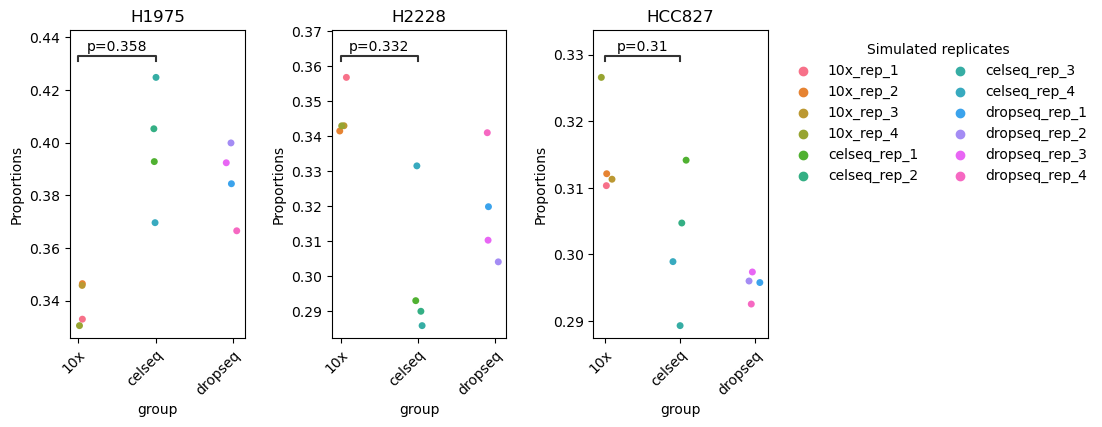

In [19]:
out_boot.plot()

------------------

## Partially replicated data

We now imagine that only the 10X dataset was replicated. This will trigger a partial bootstrapping method.

In [20]:
adata_partial = adata.copy()
adata_partial.obs.loc[adata_partial.obs["group"] != "10x", "sample"] = "S1"

In [21]:
adata_partial.obs["sample"] = "S1"

In [22]:
adata_partial.obs

,sample,group,cluster
CELL_000001,S1,10x,HCC827
CELL_000002,S1,10x,H1975
CELL_000003,S1,10x,HCC827
CELL_000004,S1,10x,HCC827
CELL_000005,S1,10x,HCC827
...,...,...,...
CELL_000140,S1,dropseq,H2228
CELL_000233,S1,dropseq,H1975
CELL_000082,S1,dropseq,HCC827
CELL_000012,S1,dropseq,H1975


In [23]:
out_boot = scanpro.scanpro(adata_partial, 
                           clusters_col='cluster', 
                           conds_col='group',
                           samples_col='sample',
                           transform='arcsin',
                           n_reps=4, 
                           conditions=['10x', 'celseq']
                          )

out_boot.results

Your data doesn't have replicates! Artificial replicates will be simulated to run scanpro.
Simulation may take some minutes...
Generating 4 replicates and running 100 simulations...
{'10x_S1_rep_1': 'S1_rep_1', 'celseq_S1_rep_1': 'S1_rep_1', 'dropseq_S1_rep_1': 'S1_rep_1', '10x_S1_rep_2': 'S1_rep_2', 'dropseq_S1_rep_2': 'S1_rep_2', 'celseq_S1_rep_2': 'S1_rep_2', '10x_S1_rep_3': 'S1_rep_3', 'celseq_S1_rep_3': 'S1_rep_3', 'dropseq_S1_rep_3': 'S1_rep_3', '10x_S1_rep_4': 'S1_rep_4', 'celseq_S1_rep_4': 'S1_rep_4', 'dropseq_S1_rep_4': 'S1_rep_4'}


LinAlgError: Singular matrix

In [ ]:
adata_partial

-----------

## Scanpro workflow

* The scanpro function is a wrapper function, to have more controls you can perform the steps below and see how the scanpro
function works

#### Get proportions and transformed proportions using `get_transformed_props` function

In [ ]:
counts, props, prop_trans = get_transformed_props(adata, sample_col='sample', cluster_col='cluster', transform='logit')

In [ ]:
counts

In [ ]:
props

In [ ]:
prop_trans

In [ ]:
# proportions of each cluster in all samples
baseline_props = adata.obs['cluster'].value_counts()/adata.obs.shape[0]
baseline_props

#### Create design matrix using `create_design` function. The matrix has samples as rows and conditions and columns, whith 1s and 0s to specify which condition belongs to which sample (independent variables). The design matrix will be used as the X matrix in the linear model fit.
##### Parameters:
    - data: anndata object, or a pandas dataframe
    - samples: name of samples column
    - conds: name of conditions/groups column

In [ ]:
design = create_design(data=adata, samples='sample', conds='group')
design

In [ ]:
# for anova -> more than 2 conditions/groups
# The coef parameter specify the columns in the design matrix containing conditions of interest
# that you want to compare
coef = np.arange(len(design.columns))
coef

#### Since we have more than 2 conditions, use the function `anova` to compare. If you have two conditions or want to only compare two, then specify a contras variable `cont = [1, -1]` with 1 and -1 match the columns of the design matrix with two conditions you want to compare. if the design matrix has more than two conditions but you only want to compare two, put 1 and -1 where they match the columns of interest and fill the rest with 0s, in this case, to compare 10x and celseq: `cont = [1, -1, 0]`

In [ ]:
scanpro.anova(props, prop_trans, design, coef, robust=True)

#### Additionally, you can specify cofactors of interest and add them to the design matrix, either specify cofactor columns in the adata.obs as parameter `cofactor` to the `create_design` function, or add it manually to the design matrix. In our case, we will add pair information that specifies which sample is a replicate

In [ ]:
X = design.iloc[:,coef]
N = len(X)  # number of samples
p = len(X.columns)  # number of conditions

In [ ]:
# add pair information to the design matrix as cofactor
cont = np.tile([1, 2], N//2)
new_design = design.copy()
new_design['pair'] = cont
new_design

In [ ]:
# run anova, taking into account pair information
scanpro.anova(props, prop_trans, new_design, coef, robust=True)

In [ ]:
# to compare only 10x and celseq, specify a contrast and run t_test
contr = [1,-1,0]
scanpro.t_test(props, prop_trans, design, contr, robust=True)